In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [57]:
data = pd.read_csv("hindi_varnamala.csv")
data

,character,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91996,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91997,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91998,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# unique categories contained in data column 'character', which are ouptput labels

print(len(data["character"].unique())) # no of unique characters
print(data["character"].unique())      # list of unique characters

46
['character_01_ka' 'character_02_kha' 'character_03_ga' 'character_04_gha'
 'character_05_kna' 'character_06_cha' 'character_07_chha'
 'character_08_ja' 'character_09_jha' 'character_10_yna'
 'character_11_taamatar' 'character_12_thaa' 'character_13_daa'
 'character_14_dhaa' 'character_15_adna' 'character_16_tabala'
 'character_17_tha' 'character_18_da' 'character_19_dha' 'character_20_na'
 'character_21_pa' 'character_22_pha' 'character_23_ba' 'character_24_bha'
 'character_25_ma' 'character_26_yaw' 'character_27_ra' 'character_28_la'
 'character_29_waw' 'character_30_motosaw' 'character_31_petchiryakha'
 'character_32_patalosaw' 'character_33_ha' 'character_34_chhya'
 'character_35_tra' 'character_36_gya' 'digit_0' 'digit_1' 'digit_2'
 'digit_3' 'digit_4' 'digit_5' 'digit_6' 'digit_7' 'digit_8' 'digit_9']


In [92]:
lst = list(data["character"].unique())
lst

['character_01_ka',
 'character_02_kha',
 'character_03_ga',
 'character_04_gha',
 'character_05_kna',
 'character_06_cha',
 'character_07_chha',
 'character_08_ja',
 'character_09_jha',
 'character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [93]:
# assigning numbers categorical labels
di = {}
for i in range(len(lst)):
    di[lst[i]] = i
di

{'character_01_ka': 0,
 'character_02_kha': 1,
 'character_03_ga': 2,
 'character_04_gha': 3,
 'character_05_kna': 4,
 'character_06_cha': 5,
 'character_07_chha': 6,
 'character_08_ja': 7,
 'character_09_jha': 8,
 'character_10_yna': 9,
 'character_11_taamatar': 10,
 'character_12_thaa': 11,
 'character_13_daa': 12,
 'character_14_dhaa': 13,
 'character_15_adna': 14,
 'character_16_tabala': 15,
 'character_17_tha': 16,
 'character_18_da': 17,
 'character_19_dha': 18,
 'character_20_na': 19,
 'character_21_pa': 20,
 'character_22_pha': 21,
 'character_23_ba': 22,
 'character_24_bha': 23,
 'character_25_ma': 24,
 'character_26_yaw': 25,
 'character_27_ra': 26,
 'character_28_la': 27,
 'character_29_waw': 28,
 'character_30_motosaw': 29,
 'character_31_petchiryakha': 30,
 'character_32_patalosaw': 31,
 'character_33_ha': 32,
 'character_34_chhya': 33,
 'character_35_tra': 34,
 'character_36_gya': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_

In [95]:
# converting categorical labels to numerical labels
k3 = []
for i in range(len(data)):
    k3.append(di[data["character"][i]])

In [96]:
data.insert(1,"label", k3)
data

,character,label,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,digit_9,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91996,digit_9,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91997,digit_9,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91998,digit_9,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
x = data.drop(["character", "label"], axis = 1) # features, here 1024 pixels
y = data["label"] # numeric labels

0
character_01_ka


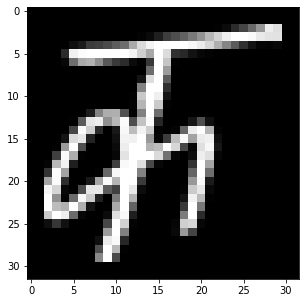

In [100]:
# here is a 2D plot of 1024 pixel as a gray scale image of ith row's data 
plt.figure(figsize = (5,5))
index = 101 # by changing index, we can see index associated row's label as well as image associated with it
grid = x.iloc[index].to_numpy().reshape(32,32) # 32*32 = 1024 pixels
plt.imshow(grid, cmap = 'gray') # it is showing gray intensity graph, gray image
print(y[index]) #numeric label
print(data["character"][index])

In [103]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify = data["label"])

In [104]:
train = train.reset_index(drop=True)
x_train = train.drop(["character", "label"], axis = 1)
x_train

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
y_train = train["label"]
y_train

0        30
1        31
2        45
3        42
4         9
         ..
73595    15
73596    17
73597    45
73598     7
73599    35
Name: label, Length: 73600, dtype: int64

In [106]:
test = test.reset_index(drop=True)
x_test = test.drop(["character", "label"], axis = 1)
x_test

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
y_test = test["label"]
y_test

0        20
1         2
2         4
3        25
4        43
         ..
18395    21
18396    26
18397     5
18398     9
18399    16
Name: label, Length: 18400, dtype: int64

In [108]:
# performing PCA to reduce feature size
# retaining 99% of orignal variance of data
pca = PCA(.99)

In [109]:
pca.fit(x_train)

PCA(n_components=0.99)

In [110]:
# pca transformed train features data

x_train = pca.transform(x_train)

In [111]:
# whopping reduction of 621 features and still retaining 99% variance of original data
x_train.shape

(73600, 403)

In [112]:
x_test = pca.transform(x_test)

In [113]:
x_test.shape

(18400, 403)

In [114]:
# satndard scaler tries to makes mean 0 and standard devation 1

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [115]:
# MinMax scaler makes data values between 0 and 1

scaler2 = MinMaxScaler()
x_train = scaler2.fit_transform(x_train)
x_test = scaler2.fit_transform(x_test)

In [116]:
x_train = pd.DataFrame(x_train)
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,402
count,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,...,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000,73600.000000
mean,0.388249,0.462771,0.444546,0.486120,0.494720,0.421062,0.493696,0.498289,0.483803,0.437464,...,0.492744,0.435445,0.491220,0.455877,0.451913,0.499828,0.461055,0.474761,0.497564,0.443084
std,0.149285,0.156477,0.139193,0.136215,0.133175,0.137260,0.126258,0.128218,0.129589,0.129642,...,0.090172,0.070253,0.075324,0.071255,0.067835,0.071009,0.089517,0.081577,0.084176,0.072332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285519,0.348124,0.346624,0.393618,0.403988,0.325438,0.408695,0.413489,0.393521,0.345954,...,0.435459,0.391833,0.444756,0.412749,0.409886,0.455038,0.404019,0.424167,0.445362,0.397960
50%,0.382889,0.461641,0.439049,0.484476,0.488515,0.412758,0.488396,0.496148,0.482375,0.432016,...,0.492658,0.435926,0.491977,0.455802,0.452114,0.499294,0.460814,0.474823,0.497761,0.443166
75%,0.483664,0.572630,0.534542,0.580086,0.580279,0.506995,0.576067,0.581878,0.572623,0.521015,...,0.549698,0.479318,0.537751,0.498708,0.494242,0.544223,0.518000,0.525383,0.549913,0.488068
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
x_test = pd.DataFrame(x_test)
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,402
count,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,...,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000,18400.000000
mean,0.385235,0.448869,0.491833,0.503408,0.497925,0.425947,0.515881,0.507619,0.477106,0.416124,...,0.542201,0.507564,0.646944,0.406367,0.484863,0.454604,0.489783,0.521884,0.425007,0.420435
std,0.153195,0.165697,0.152317,0.140659,0.139235,0.146483,0.128592,0.136526,0.133457,0.141455,...,0.094125,0.070060,0.075198,0.073971,0.080694,0.095780,0.083187,0.086162,0.096340,0.074596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279170,0.328114,0.385940,0.407096,0.402724,0.323880,0.427458,0.416414,0.384248,0.316531,...,0.482845,0.464247,0.600891,0.361613,0.435129,0.394730,0.437382,0.468955,0.363622,0.374471
50%,0.380076,0.447481,0.485852,0.502486,0.493293,0.417835,0.510905,0.506378,0.475965,0.410332,...,0.542316,0.508198,0.647425,0.406270,0.484945,0.453635,0.489472,0.522485,0.424318,0.420803
75%,0.485992,0.565793,0.591257,0.599416,0.588706,0.517179,0.598676,0.597752,0.567732,0.507253,...,0.601499,0.551028,0.693071,0.451008,0.533979,0.514365,0.541798,0.575875,0.485064,0.466566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
model1 = keras.Sequential([
    keras.layers.Dense(46, input_shape=(403,), activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2300/2300 [==============================] - 3s 1ms/step - loss: 3.6843 - accuracy: 0.0924
Epoch 2/100
2300/2300 [==============================] - 3s 1ms/step - loss: 3.2957 - accuracy: 0.2996
Epoch 3/100
2300/2300 [==============================] - 8s 3ms/step - loss: 2.9658 - accuracy: 0.4235
Epoch 4/100
2300/2300 [==============================] - 8s 3ms/step - loss: 2.6874 - accuracy: 0.4958
Epoch 5/100
2300/2300 [==============================] - 8s 4ms/step - loss: 2.4604 - accuracy: 0.5368
Epoch 6/100
2300/2300 [==============================] - 7s 3ms/step - loss: 2.2754 - accuracy: 0.5664
Epoch 7/100
2300/2300 [==============================] - 7s 3ms/step - loss: 2.1246 - accuracy: 0.5834
Epoch 8/100
2300/2300 [==============================] - 7s 3ms/step - loss: 2.0013 - accuracy: 0.5994
Epoch 9/100
2300/2300 [==============================] - 6s 2ms/step - loss: 1.8961 - accuracy: 0.6121
Epoch 10/100
2300/2300 [==============================] - 9s 4ms/step - l

2300/2300 [==============================] - 2s 966us/step - loss: 0.9752 - accuracy: 0.7483
Epoch 80/100
2300/2300 [==============================] - 3s 1ms/step - loss: 0.9722 - accuracy: 0.7474
Epoch 81/100
2300/2300 [==============================] - 3s 1ms/step - loss: 0.9697 - accuracy: 0.7480
Epoch 82/100
2300/2300 [==============================] - 3s 1ms/step - loss: 0.9702 - accuracy: 0.7487
Epoch 83/100
2300/2300 [==============================] - 2s 1ms/step - loss: 0.9678 - accuracy: 0.7479
Epoch 84/100
2300/2300 [==============================] - 2s 991us/step - loss: 0.9657 - accuracy: 0.7494
Epoch 85/100
2300/2300 [==============================] - 4s 2ms/step - loss: 0.9642 - accuracy: 0.7500
Epoch 86/100
2300/2300 [==============================] - 3s 1ms/step - loss: 0.9634 - accuracy: 0.7493
Epoch 87/100
2300/2300 [==============================] - 2s 1ms/step - loss: 0.9603 - accuracy: 0.7500
Epoch 88/100
2300/2300 [==============================] - 2s 994us/step -

In [140]:
model = keras.Sequential([
                          keras.layers.Dense(403, input_shape=(403,), activation='sigmoid'),
                          keras.layers.Dense(46, activation='sigmoid')
                        ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
2300/2300 [==============================] - 5s 2ms/step - loss: 3.6522 - accuracy: 0.0898
Epoch 2/10
2300/2300 [==============================] - 5s 2ms/step - loss: 2.2795 - accuracy: 0.4546
Epoch 3/10
2300/2300 [==============================] - 5s 2ms/step - loss: 1.6037 - accuracy: 0.5920
Epoch 4/10
2300/2300 [==============================] - 5s 2ms/step - loss: 1.3861 - accuracy: 0.6305
Epoch 5/10
2300/2300 [==============================] - 4s 2ms/step - loss: 1.2869 - accuracy: 0.6521
Epoch 6/10
2300/2300 [==============================] - 8s 3ms/step - loss: 1.2256 - accuracy: 0.6652
Epoch 7/10
2300/2300 [==============================] - 12s 5ms/step - loss: 1.1793 - accuracy: 0.6779
Epoch 8/10
2300/2300 [==============================] - 12s 5ms/step - loss: 1.1523 - accuracy: 0.6851
Epoch 9/10
2300/2300 [==============================] - 12s 5ms/step - loss: 1.1247 - accuracy: 0.6920
Epoch 10/10
2300/2300 [==============================] - 13s 5ms/step - loss: 1

In [142]:
y_predicted = model1.predict(x_test)

In [143]:
model1.evaluate(x_test, y_test)

575/575 [==============================] - 1s 1ms/step - loss: 1.1941 - accuracy: 0.6768


[1.194149136543274, 0.6767934560775757]